In [1]:
from f_drosophila_infer import *
from f_train import *
from f_data_prep import *
from sklearn import linear_model

In [2]:
with open('./pickles/LAD_quad.pkl', 'rb') as f:
    LAD_quad = pickle.load(f)
    
with open('./pickles/skl_quad.pkl', 'rb') as f:
    skl_quad = pickle.load(f)

In [3]:
data_all = np.loadtxt('../data_complete.txt')
median = np.median(data_all, axis=0)
# data_all = data_all - median
all_bin = np.vsplit(data_all, 6)
all_init = np.vstack([all_bin[i] for i in range(5)])
all_diff = np.vstack([all_bin[i+1]-all_bin[i] for i in range(5)])

complete_all = ([int(x) - 1 for x in open('../indices_complete.txt','r').readline().split()])
comp_ind = list(map(int, list((np.array(complete_all)[::6]-3)/6)))

quad_init = np.copy(all_init)
for i in range(len(comp_ind)-1):
    for j in range(i+1, len(comp_ind)):
        quad_init = np.hstack((quad_init, (all_init[:,comp_ind[i]]*all_init[:,comp_ind[j]])[:,None]))
print('initial gene with quad var: ', quad_init.shape)

y_actual = np.vstack([all_bin[i+1] for i in range(5)])
print('Target gene at t_+1: ', y_actual.shape)

initial gene with quad var:  (30390, 450)
Target gene at t_+1:  (30390, 99)


In [4]:
error_cell_list = []
error2_cell_list = []
for i in range(10):
    w = LAD_quad[0][-2][i]
    bias = LAD_quad[0][-1][i]
    y_pred = bias + quad_init.dot(w)
    error = np.sum(np.abs(y_pred[:,comp_ind] - all_diff[:,comp_ind]), axis=1)
    error_bin = np.vsplit(error[:,None], 5)
    error_cell = np.median(error_bin, axis=0)
    error_cell_list.append(error_cell)
    
    error2 = (np.sum(np.abs(y_pred[:,comp_ind] - all_diff[:,comp_ind])**2, axis=1))**(1/2)
    error2_bin = np.vsplit(error2[:,None], 5)
    error2_cell = np.median(error2_bin, axis=0)
    error2_cell_list.append(error2_cell)
error_cell_LAD = np.mean(error_cell_list, axis=0)
error2_cell_LAD = np.mean(error2_cell_list, axis=0)
# print(len(error_cell_ER))
# print(len(error2_cell_ER))

raw_data = np.loadtxt('../dmel_data.txt').T
xyz = raw_data[:,:3]
xlabels = ['x', 'y', 'z']

# fig = plt.figure(figsize=(16,6))
# ax = fig.add_subplot(121)
# xy = ax.scatter(xyz[:,0], xyz[:,1], c=error_cell_ER.flatten(), s=15, cmap=plt.cm.PiYG)
# plt.colorbar(xy)
# ax.set_xlabel(xlabels[0])
# ax.set_ylabel(xlabels[1])
# ax = fig.add_subplot(122)
# xz = ax.scatter(xyz[:,0], xyz[:,2], c=error_cell_ER.flatten(), s=15, cmap=plt.cm.PiYG)
# plt.colorbar(xz)
# ax.set_xlabel(xlabels[0])
# ax.set_ylabel(xlabels[2])
# plt.show()

error_cell_list = []
error2_cell_list=[]
for i in range(10):
    w = skl_quad[0][-2][i].T
    bias = skl_quad[0][-1][i]
    y_pred = bias + quad_init.dot(w)
    print(y_pred.shape)
    error = (np.sum(np.abs(y_pred[:,comp_ind] - all_diff[:,comp_ind])**2, axis=1))**(1/2)
    error_bin = np.vsplit(error[:,None], 5)
    error_cell = np.median(error_bin, axis=0)
    error_cell_list.append(error_cell)
    
    error2 = np.sum(np.abs(y_pred[:,comp_ind] - all_diff[:,comp_ind]), axis=1)
    error2_bin = np.vsplit(error2[:,None], 5)
    error2_cell = np.median(error2_bin, axis=0)
    error2_cell_list.append(error2_cell)
error_cell_skl = np.mean(error_cell_list, axis=0)
error2_cell_skl = np.mean(error2_cell_list, axis=0)
# print(len(error_cell_skl))
# print(len(error2_cell_skl))

raw_data = np.loadtxt('../dmel_data.txt').T
xyz = raw_data[:,:3]
xlabels = ['x', 'y', 'z']

# fig = plt.figure(figsize=(16,6))
# ax = fig.add_subplot(121)
# xy = ax.scatter(xyz[:,0], xyz[:,1], c=error_cell_skl.flatten(), s=15, cmap=plt.cm.PiYG)
# plt.colorbar(xy)
# ax.set_xlabel(xlabels[0])
# ax.set_ylabel(xlabels[1])
# ax = fig.add_subplot(122)
# xz = ax.scatter(xyz[:,0], xyz[:,2], c=error_cell_skl.flatten(), s=15, cmap=plt.cm.PiYG)
# plt.colorbar(xz)
# ax.set_xlabel(xlabels[0])
# ax.set_ylabel(xlabels[2])
# plt.show()

# error_cell_diff = error_cell_skl - error_cell_ER
# fig = plt.figure(figsize=(16,6))
# ax = fig.add_subplot(121)
# xy = ax.scatter(xyz[:,0], xyz[:,1], c=error_cell_diff.flatten(), s=15, cmap=plt.cm.PiYG)
# plt.colorbar(xy)
# ax.set_xlabel(xlabels[0])
# ax.set_ylabel(xlabels[1])
# ax = fig.add_subplot(122)
# xz = ax.scatter(xyz[:,0], xyz[:,2], c=error_cell_diff.flatten(), s=15, cmap=plt.cm.PiYG)
# plt.colorbar(xz)
# ax.set_xlabel(xlabels[0])
# ax.set_ylabel(xlabels[2])
# plt.show()

(30390, 99)
(30390, 99)
(30390, 99)
(30390, 99)
(30390, 99)
(30390, 99)
(30390, 99)
(30390, 99)
(30390, 99)
(30390, 99)


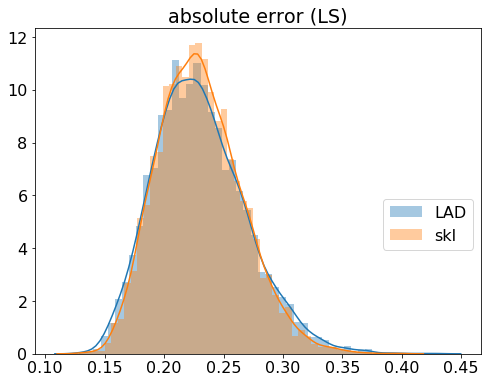

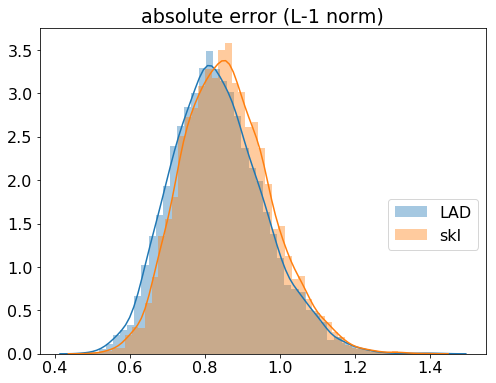

In [5]:
import seaborn as sns

# plt.figure(figsize=(8,6))
# sns.distplot(error_cell_ER-np.median(error_cell_ER), label='LAD')
# sns.distplot(error_cell_skl - np.median(error_cell_skl), label='skl')
# plt.legend(bbox_to_anchor=(1,0.5))
# plt.title('subtracted median absolute error')
# plt.show()

# plt.figure(figsize=(8,6))
# sns.distplot(error_cell_ER, label='LAD')
# sns.distplot(error_cell_skl, label='skl')
# plt.legend(bbox_to_anchor=(1,0.5))
# plt.title('no shift absolute error')
# plt.show()

plt.figure(figsize=(8,6))
sns.distplot(error2_cell_LAD, label='LAD')
sns.distplot(error_cell_skl, label='skl')
plt.legend(bbox_to_anchor=(1,0.5))
plt.title('absolute error (LS)')
plt.show()

plt.figure(figsize=(8,6))
sns.distplot(error_cell_LAD, label='LAD')
sns.distplot(error2_cell_skl, label='skl')
plt.legend(bbox_to_anchor=(1,0.5))
plt.title('absolute error (L-1 norm)')
plt.show()

In [6]:
# plt.figure(figsize=(8,6))
# plt.hist(error_cell_skl - np.median(error_cell_skl), bins=100, alpha=0.3, label='skl')
# plt.hist(error_cell_ER - np.median(error_cell_ER), bins=100, alpha=0.3, label='ER')
# plt.legend()
# plt.show()



In [7]:
# gene_sub = [98,61,35]
incomp_ind = np.delete(range(99), comp_ind)
error_cell_list = []
error2_cell_list = []
for i in range(10):
    w = LAD_quad[0][-2][i]
    bias = LAD_quad[0][-1][i]
    y_pred = bias + quad_init.dot(w)
    error = np.sum(np.abs(y_pred[:,incomp_ind] - all_diff[:,incomp_ind]), axis=1)
    error_bin = np.vsplit(error[:,None], 5)
    error_cell = np.median(error_bin, axis=0)
    error_cell_list.append(error_cell)
    
    error2 = (np.sum(np.abs(y_pred[:,incomp_ind] - all_diff[:,incomp_ind])**2, axis=1))**(1/2)
    error2_bin = np.vsplit(error2[:,None], 5)
    error2_cell = np.median(error2_bin, axis=0)
    error2_cell_list.append(error2_cell)
error_cell_LAD = np.mean(error_cell_list, axis=0)
error2_cell_LAD = np.mean(error2_cell_list, axis=0)

raw_data = np.loadtxt('../dmel_data.txt').T
xyz = raw_data[:,:3]
xlabels = ['x', 'y', 'z']

# fig = plt.figure(figsize=(16,6))
# ax = fig.add_subplot(121)
# xy = ax.scatter(xyz[:,0], xyz[:,1], c=error_cell_ER.flatten(), s=15, cmap=plt.cm.PiYG)
# plt.colorbar(xy)
# ax.set_xlabel(xlabels[0])
# ax.set_ylabel(xlabels[1])
# ax = fig.add_subplot(122)
# xz = ax.scatter(xyz[:,0], xyz[:,2], c=error_cell_ER.flatten(), s=15, cmap=plt.cm.PiYG)
# plt.colorbar(xz)
# ax.set_xlabel(xlabels[0])
# ax.set_ylabel(xlabels[2])
# plt.show()

error_cell_list = []
error2_cell_list = []
for i in range(10):
    w = skl_quad[0][-2][i].T
    bias = skl_quad[0][-1][i]
    y_pred = bias + quad_init.dot(w)
    error = (np.sum(np.abs(y_pred[:,incomp_ind] - all_diff[:,incomp_ind])**2, axis=1))**(1/2)
    error_bin = np.vsplit(error[:,None], 5)
    error_cell = np.median(error_bin, axis=0)
    error_cell_list.append(error_cell)
    
    error2 = np.sum(np.abs(y_pred[:,incomp_ind] - all_diff[:,incomp_ind]), axis=1)
    error2_bin = np.vsplit(error2[:,None], 5)
    error2_cell = np.median(error2_bin, axis=0)
    error2_cell_list.append(error2_cell)
error_cell_skl = np.mean(error_cell_list, axis=0)
error2_cell_skl = np.mean(error2_cell_list, axis=0)

raw_data = np.loadtxt('../dmel_data.txt').T
xyz = raw_data[:,:3]
xlabels = ['x', 'y', 'z']

# fig = plt.figure(figsize=(16,6))
# ax = fig.add_subplot(121)
# xy = ax.scatter(xyz[:,0], xyz[:,1], c=error_cell_skl.flatten(), s=15, cmap=plt.cm.PiYG)
# plt.colorbar(xy)
# ax.set_xlabel(xlabels[0])
# ax.set_ylabel(xlabels[1])
# ax = fig.add_subplot(122)
# xz = ax.scatter(xyz[:,0], xyz[:,2], c=error_cell_skl.flatten(), s=15, cmap=plt.cm.PiYG)
# plt.colorbar(xz)
# ax.set_xlabel(xlabels[0])
# ax.set_ylabel(xlabels[2])
# plt.show()

# error_cell_diff = error_cell_skl - error_cell_ER
# fig = plt.figure(figsize=(16,6))
# ax = fig.add_subplot(121)
# xy = ax.scatter(xyz[:,0], xyz[:,1], c=error_cell_diff.flatten(), s=15, cmap=plt.cm.PiYG)
# plt.colorbar(xy)
# ax.set_xlabel(xlabels[0])
# ax.set_ylabel(xlabels[1])
# ax = fig.add_subplot(122)
# xz = ax.scatter(xyz[:,0], xyz[:,2], c=error_cell_diff.flatten(), s=15, cmap=plt.cm.PiYG)
# plt.colorbar(xz)
# ax.set_xlabel(xlabels[0])
# ax.set_ylabel(xlabels[2])
# plt.show()

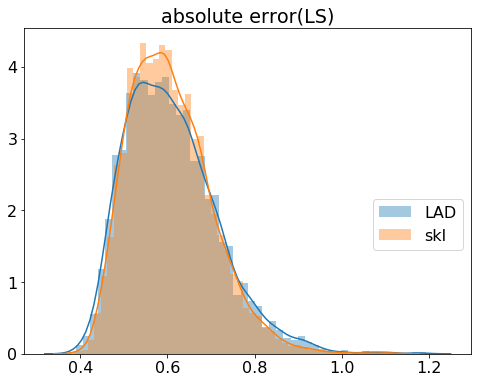

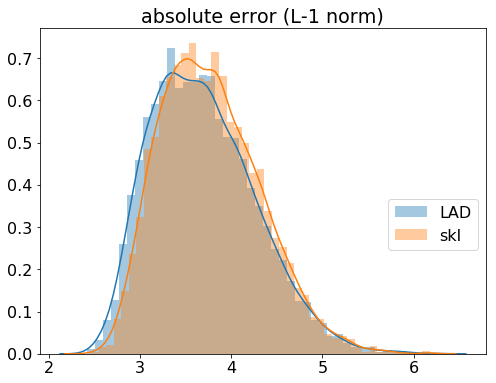

In [8]:
import seaborn as sns

# plt.figure(figsize=(8,6))
# sns.distplot(error_cell_ER-np.median(error_cell_ER), label='LAD')
# sns.distplot(error_cell_skl - np.median(error_cell_skl), label='skl')
# plt.legend(bbox_to_anchor=(1,0.5))
# plt.title('subtracted median absolute error')
# plt.show()

# plt.figure(figsize=(8,6))
# sns.distplot(error_cell_ER, label='LAD')
# sns.distplot(error_cell_skl, label='skl')
# plt.legend(bbox_to_anchor=(1,0.5))
# plt.title('no shift absolute error')
# plt.show()

plt.figure(figsize=(8,6))
sns.distplot(error2_cell_LAD, label='LAD')
sns.distplot(error_cell_skl, label='skl')
plt.legend(bbox_to_anchor=(1,0.5))
plt.title('absolute error(LS)')
plt.show()

plt.figure(figsize=(8,6))
sns.distplot(error_cell_LAD, label='LAD')
sns.distplot(error2_cell_skl, label='skl')
plt.legend(bbox_to_anchor=(1,0.5))
plt.title('absolute error (L-1 norm)')
plt.show()

In [9]:
# gene_sub = [98,61,35]
incomp_ind = np.delete(range(99), comp_ind)
error_cell_list = []
error2_cell_list = []
for i in range(10):
    w = LAD_quad[0][-2][i]
    bias = LAD_quad[0][-1][i]
    y_pred = bias + quad_init.dot(w)
    error = np.sum(np.abs(y_pred[:,incomp_ind] - all_diff[:,incomp_ind]), axis=1)/np.sum(np.abs(all_diff[:,incomp_ind]), axis=1)
    error_bin = np.vsplit(error[:,None], 5)
    error_cell = np.median(error_bin, axis=0)
    error_cell_list.append(error_cell)
    
    error2 = (np.sum(np.abs(y_pred[:,incomp_ind] - all_diff[:,incomp_ind])**2, axis=1)/np.sum(np.abs(all_diff[:,incomp_ind])**2, axis=1))**(1/2)
    error2_bin = np.vsplit(error2[:,None], 5)
    error2_cell = np.median(error2_bin, axis=0)
    error2_cell_list.append(error2_cell)
error_cell_LAD = np.mean(error_cell_list, axis=0)
error2_cell_LAD = np.mean(error2_cell_list, axis=0)

raw_data = np.loadtxt('../dmel_data.txt').T
xyz = raw_data[:,:3]
xlabels = ['x', 'y', 'z']

# fig = plt.figure(figsize=(16,6))
# ax = fig.add_subplot(121)
# xy = ax.scatter(xyz[:,0], xyz[:,1], c=error_cell_ER.flatten(), s=15, cmap=plt.cm.PiYG)
# plt.colorbar(xy)
# ax.set_xlabel(xlabels[0])
# ax.set_ylabel(xlabels[1])
# ax = fig.add_subplot(122)
# xz = ax.scatter(xyz[:,0], xyz[:,2], c=error_cell_ER.flatten(), s=15, cmap=plt.cm.PiYG)
# plt.colorbar(xz)
# ax.set_xlabel(xlabels[0])
# ax.set_ylabel(xlabels[2])
# plt.show()

error_cell_list = []
error2_cell_list = []
for i in range(10):
    w = skl_quad[0][-2][i].T
    bias = skl_quad[0][-1][i]
    y_pred = bias + quad_init.dot(w)
    print(y_pred.shape)
    error = (np.sum(np.abs(y_pred[:,incomp_ind] - all_diff[:,incomp_ind])**2, axis=1)/np.sum(np.abs(all_diff[:,incomp_ind])**2, axis=1))**(1/2)
    error_bin = np.vsplit(error[:,None], 5)
    error_cell = np.median(error_bin, axis=0)
    error_cell_list.append(error_cell)
    
    error2 = np.sum(np.abs(y_pred[:,incomp_ind] - all_diff[:,incomp_ind]), axis=1)/np.sum(np.abs(all_diff[:,incomp_ind]), axis=1)
    error2_bin = np.vsplit(error2[:,None], 5)
    error2_cell = np.median(error2_bin, axis=0)
    error2_cell_list.append(error2_cell)
error_cell_skl = np.mean(error_cell_list, axis=0)
error2_cell_skl = np.mean(error2_cell_list, axis=0)

raw_data = np.loadtxt('../dmel_data.txt').T
xyz = raw_data[:,:3]
xlabels = ['x', 'y', 'z']

# fig = plt.figure(figsize=(16,6))
# ax = fig.add_subplot(121)
# xy = ax.scatter(xyz[:,0], xyz[:,1], c=error_cell_skl.flatten(), s=15, cmap=plt.cm.PiYG)
# plt.colorbar(xy)
# ax.set_xlabel(xlabels[0])
# ax.set_ylabel(xlabels[1])
# ax = fig.add_subplot(122)
# xz = ax.scatter(xyz[:,0], xyz[:,2], c=error_cell_skl.flatten(), s=15, cmap=plt.cm.PiYG)
# plt.colorbar(xz)
# ax.set_xlabel(xlabels[0])
# ax.set_ylabel(xlabels[2])
# plt.show()

# error_cell_diff = error_cell_skl - error_cell_ER
# fig = plt.figure(figsize=(16,6))
# ax = fig.add_subplot(121)
# xy = ax.scatter(xyz[:,0], xyz[:,1], c=error_cell_diff.flatten(), s=15, cmap=plt.cm.PiYG)
# plt.colorbar(xy)
# ax.set_xlabel(xlabels[0])
# ax.set_ylabel(xlabels[1])
# ax = fig.add_subplot(122)
# xz = ax.scatter(xyz[:,0], xyz[:,2], c=error_cell_diff.flatten(), s=15, cmap=plt.cm.PiYG)
# plt.colorbar(xz)
# ax.set_xlabel(xlabels[0])
# ax.set_ylabel(xlabels[2])
# plt.show()

(30390, 99)
(30390, 99)
(30390, 99)
(30390, 99)
(30390, 99)
(30390, 99)
(30390, 99)
(30390, 99)
(30390, 99)
(30390, 99)


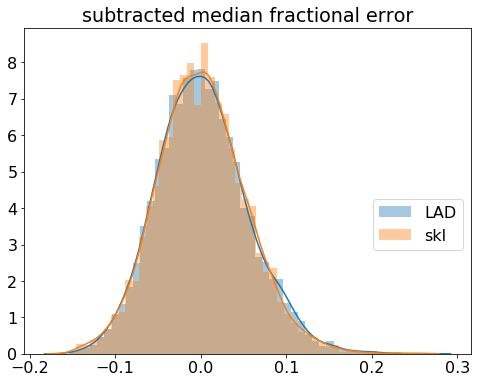

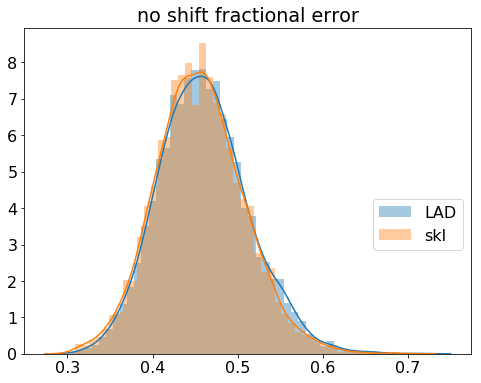

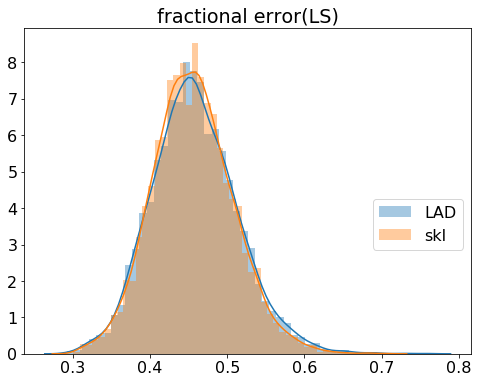

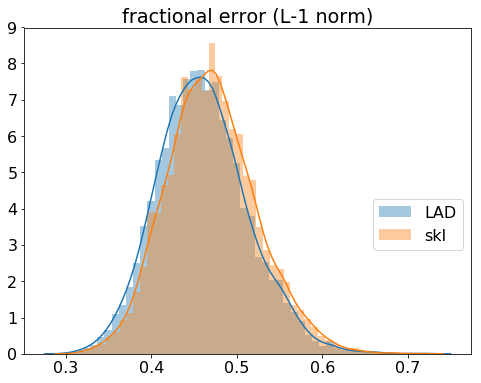

In [10]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.distplot(error_cell_LAD-np.median(error_cell_LAD), label='LAD')
sns.distplot(error_cell_skl - np.median(error_cell_skl), label='skl')
plt.legend(bbox_to_anchor=(1,0.5))
plt.title('subtracted median fractional error')
plt.show()

plt.figure(figsize=(8,6))
sns.distplot(error_cell_LAD, label='LAD')
sns.distplot(error_cell_skl, label='skl')
plt.legend(bbox_to_anchor=(1,0.5))
plt.title('no shift fractional error')
plt.show()

plt.figure(figsize=(8,6))
sns.distplot(error2_cell_LAD, label='LAD')
sns.distplot(error_cell_skl, label='skl')
plt.legend(bbox_to_anchor=(1,0.5))
plt.title('fractional error(LS)')
plt.show()

plt.figure(figsize=(8,6))
sns.distplot(error_cell_LAD, label='LAD')
sns.distplot(error2_cell_skl, label='skl')
plt.legend(bbox_to_anchor=(1,0.5))
plt.title('fractional error (L-1 norm)')
plt.show()

# plt.figure(figsize=(8,6))
# sns.distplot(error2_cell_ER, label='ER')
# sns.distplot(error_cell_skl, label='skl')
# plt.legend(bbox_to_anchor=(1,0.5))
# plt.title('absolute error(L-2 norm)')
# plt.show()

# plt.figure(figsize=(8,6))
# sns.distplot(error_cell_ER, label='ER')
# sns.distplot(error2_cell_skl, label='skl')
# plt.legend(bbox_to_anchor=(1,0.5))
# plt.title('absolute error (median)')
# plt.show()

### from ER_quad:
- gene index for min(error), median(error), max(error)

In [11]:
min_arg = comp_ind[np.argmin(skl_quad[0][0][comp_ind])]
max_arg = comp_ind[np.argmax(skl_quad[0][0][comp_ind])]
med_arg = comp_ind[np.where(skl_quad[0][0][comp_ind] == np.median(skl_quad[0][0][comp_ind]))[0][0]]

print(min_arg, med_arg, max_arg)

98 61 35


### from skl_quad:
- gene index for min(error) median(error, max(error)

In [12]:
min_arg = comp_ind[np.argmin(LAD_quad[0][0][comp_ind])]
max_arg = comp_ind[np.argmax(LAD_quad[0][0][comp_ind])]
med_arg = comp_ind[np.where(LAD_quad[0][0][comp_ind] == np.median(ER_quad[0][0][comp_ind]))[0][0]]

print(min_arg, med_arg, max_arg)

NameError: name 'ER_quad' is not defined